# Подходы используемые для хранения 

Литература:
- [Интересная статья про шардинг](https://highload.guide/blog/sharding-patterns-and-antipatterns.html) 
- [Шардирование таблиц в ClickHouse](https://yandex.cloud/ru/docs/managed-clickhouse/tutorials/sharding)
- [Движок Distributed в ClickHouse](https://clickhouse.com/docs/ru/engines/table-engines/special/distributed)
- [Маркитантов А., FAISS: Быстрый поиск лиц и клонов на многомиллионных данных](https://habr.com/ru/companies/okkamgroup/articles/509204/)
- [Хабр статья про согласованность данных](https://habr.com/ru/companies/vk/articles/723734/)
- [Теория шардирования Хабр](https://habr.com/ru/companies/oleg-bunin/articles/433370/)
- [Про партицирование из документации на примере postrgre](https://www.postgresql.org/docs/13/ddl-partitioning.html)
- [Перебалансировка и распределенные транзакции в реляционных базах данных](https://eax.me/sharding/)

## Введение

Причины важности эффективного хранения и обработки больших данных:
- Увеличение объемов данных
- Разнообразие данных
- Скорость поступления данных
- Повышение производительности и снижение затрат
- Улучшение качества данных
- Поддержка машинного обучения

Основные понятия лекции:
- Большие данные - прошлая лекция)
- Распределенное хранение данных
- Партиционирование, шардирование
- Ранжирование
- Многофазный поиск
- Вероятностный поиск

## Распределенное хранение данных

Распределенное хранение данных — это метод хранения данных, при котором данные распределяются по нескольким узлам или серверам, которые могут находиться в разных географических локациях. Это позволяет обеспечить высокую доступность, масштабируемость и производительность системы.

Примеры систем распределенного хранения

- Hadoop Distributed File System (HDFS)
   - Описание: HDFS — это распределенная файловая система, разработанная для хранения и обработки больших объемов данных. Она является частью экосистемы Apache Hadoop.
   - Принципы работы:
        Данные разделяются на блоки (обычно размером 64 МБ или 128 МБ) и распределяются по различным узлам кластера.
        Данные реплицируются на несколько узлов для обеспечения отказоустойчивости.
   - Пример использования: HDFS широко используется в компаниях, таких как Yahoo, Facebook и Twitter, для хранения и обработки больших объемов данных, включая логи веб-серверов, данные социальных сетей и многое другое.

- Apache Cassandra
   - Описание: Apache Cassandra — это распределенная база данных NoSQL, разработанная для высокой доступности и масштабируемости.
   - Принципы работы:
        Данные разделяются на шарды и распределяются по различным узлам кластера.
        Данные реплицируются на несколько узлов для обеспечения отказоустойчивости.
        Cassandra использует модель данных "ключ-значение" и поддерживает гибкую схему данных.
   - Пример использования: Cassandra используется в компаниях, таких как Netflix, для хранения данных о просмотрах и рекомендациях, а также в компании Apple для хранения данных о пользователях и устройствах.

## Шардирование

Партицирование, или секционирование, базы данных — разделение данных, хранящихся в базе данных, на части.

В postgre максимальный размер одной таблицы 32ТБ. https://www.postgresql.org/docs/

Вертикальное

Такое шардирование предполагает разделение данных по столбцам. В этом случае каждый шард содержит часть столбцов массива и все связанные с ними строки данных. Вертикальное шардирование может быть полезно, когда некоторые столбцы используются чаще, а другие — реже. Это вид шардирования может использоваться в пределах одного сервера путем обновления оборудования.

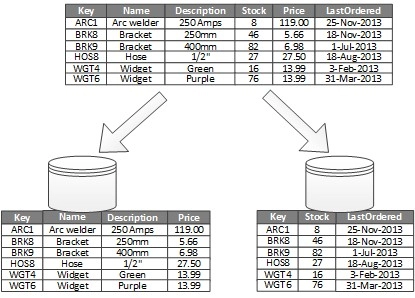

Горизонтальное

Этот вид подразумевает разделение хранилища на сгруппированные по каким-либо критериям строки. В этом случае каждый шард содержит одинаковые столбцы, но разные строки данных. Горизонтальное шардирование позволяет распределить нагрузку на запись и чтение данных между различными серверами, за каждый из которых отвечает отдельная машина.

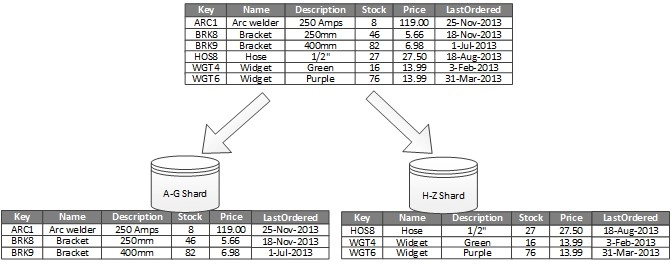

Функциональное

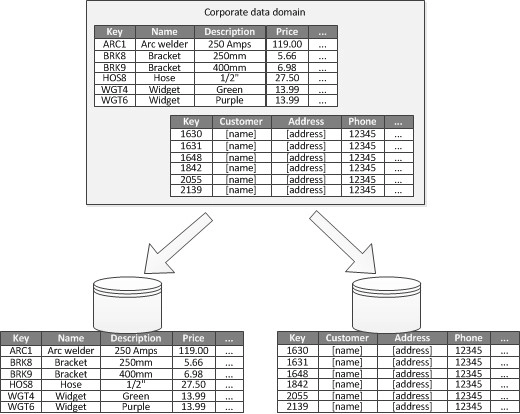

На основании [YandexCloud](https://yandex.cloud/ru/docs/glossary/sharding?utm_referrer=https%3A%2F%2Fwww.google.com%2F "Нет единой терминалогии, поэтому в данном случае осталяю ссылку на источник")
Существует несколько основных методов шардирования данных. Поскольку все они имеют свои особенности, выбор конкретного зависит от требований продукта. Рассмотрим самые распространенные:
- **Хешированное** — данные разбиваются на шарды на основе хеш-функции, которая принимает входные данные и возвращает хеш-значение. Это значение определяет, в какой шард будет помещена каждая запись данных. Метод позволяет достичь высокой производительности и отсутствия единой точки отказа, однако усложняет поиск данных.
- **Диапазонное** — данные разбиваются на шарды на основе диапазона значений. Значения могут присваиваться с помощью ключей (ключевое шардирование) и других атрибутов. Метод прост в реализации и позволяет быстрее находить информацию, чем при хешировании, однако может привести к несбалансированности базы.
- **Круговое** — шарды упорядочиваются в виде кольца и каждый из них ответственен за определенный диапазон значений. Запросы на данные маршрутизируются в соответствии с позицией шарда в кольце. Запросы распределяются равномерно, но при добавлении и удалении шардов требуется перераспределение данных.
- **Динамическое** — позволяет автоматически масштабировать хранилище в зависимости от текущей производительности и объема данных. Высокая гибкость такого хранилища требует надежную систему мониторинга и балансировки нагрузки, а также хорошо продуманную архитектуру базы данных.

Преимущества шардирования
Если база данных разрослась так сильно, что ее нельзя отмасштабировать, просто повысив вычислительные мощности, то на помощь приходит шардирование. Какие проблемы можно решить:
- **Преодолеть технические ограничения**. Набирающие популярность продукты в итоге сталкиваются с потолком возможностей оборудования, и данные могут быть разделены по разным машинам, чтобы обеспечить возможность роста.
- **Повысить надежность**. Если шарды базы данных физически находятся на разных серверах, то отказ одного из них не означает прекращение работы остальных. То есть вместо полного прекращения доступа к сайту или приложению может перестать работать лишь какая-то его часть.
- **Ускорить доступ к данным**. Продукты с большой монолитной базой данных обычно не отличаются производительностью, так как запросы к ним конкурируют друг с другом. Шардирование помогает распределить нагрузку, увеличить объемы и скорость обработки данных.

Недостатки шардирования
Хотя без шардирования иногда никак не обойтись, у такой архитектуры базы данных есть и существенные недостатки, из-за которых в некоторых случаях использовать его не рекомендуется. Основные из них включают:
- **Сложность реализации**. Ошибки при шардировании могут стоить части данных или привести к повреждению хранилища. Также при разделении возникает риск того, что команда разработчиков будет работать менее эффективно. Вместо единой точки входа им придется управлять данными из нескольких сегментов.
- **Несбалансированность данных**. Иногда бывает трудно предугадать, как будут накапливаться данные, и какой-то сервер может оказаться более загруженным, чем остальные. Например, какая-то часть пользователей соцсети стала гораздо популярнее всех остальных, а связанные с ними данные концентрируются на одном сервере. Для решения приходится прибегать к повторному сегментированию, но это приводит к простою серверов.
- **Потеря производительности при сложных запросах**. Запрос одновременно к нескольким шардам будет иметь повышенную задержку. Для получения данных нужно будет обратиться к нескольким сегментам одновременно, что гораздо медленнее, чем получить данные из одной таблицы.

### Routing (Маршрутизация)

[Клиентский роутинг](https://habr.com/ru/articles/804827/)

### Реплики

### Resharding

## Ранжирование

Ранжирование — это процесс упорядочивания элементов в соответствии с определенными критериями или метриками. В контексте больших данных и информационных систем, ранжирование используется для выделения наиболее релевантных или важных элементов из большого набора данных. Основные принципы ранжирования включают:

- **Релевантность**: Элементы ранжируются в зависимости от их соответствия запросу или контексту. Например, в поисковых системах результаты ранжируются по их релевантности к введенному запросу.
- **Популярность**: Элементы могут ранжироваться на основе их популярности, например, количества просмотров, лайков или скачиваний.
- **Качество**: Элементы могут ранжироваться по качеству контента, например, на основе оценок пользователей или экспертных оценок.
- **Временная актуальность**: Элементы могут ранжироваться по их актуальности, например, новости или события, которые произошли недавно.
- **Персонализация**: Элементы могут ранжироваться на основе предпочтений и поведения конкретного пользователя, что позволяет предоставлять более персонализированные результаты.

## Многофазный поиск

**Многофазный поиск** — это метод поиска информации, который включает несколько последовательных этапов или фаз для обработки и фильтрации данных. Этот подход позволяет постепенно сужать набор данных, чтобы в конечном итоге получить наиболее релевантные результаты. 

Основные принципы многофазного поиска включают:
- **Поэтапная фильтрация**: На каждом этапе применяются различные критерии или алгоритмы для фильтрации данных. Это позволяет постепенно уменьшать объем данных, с которыми работает система
- **Иерархическая структура**: Многофазный поиск часто использует иерархическую структуру данных, где каждый уровень представляет собой определенный уровень детализации или агрегации.
- **Параллельная обработка**: Некоторые фазы могут выполняться параллельно, что позволяет ускорить процесс поиска и обработки данных.
- **Адаптивность**: Многофазный поиск может адаптироваться к различным условиям и требованиям, изменяя критерии фильтрации на каждом этапе в зависимости от контекста или пользовательских запросов.
- **Оптимизация ресурсов**: Поэтапная обработка данных позволяет оптимизировать использование ресурсов, таких как память и вычислительная мощность, что особенно важно в системах больших данных.

## Вероятностный поиск

Вероятностный поиск — это метод поиска информации, который использует вероятностные модели для оценки релевантности документов или элементов данных по отношению к запросу пользователя.
Вероятностные модели используют различные методы для оценки релевантности, такие как модель вероятностного ранжирования (Probabilistic Ranking Principle), которая утверждает, что документы должны быть отсортированы по убыванию вероятности их релевантности.


### Best Matching 25

### Learning to Rank

# HW

Установить хранилище clickhouse с распределенной БД (движок Distributed MergeTree) В котором провести следующие эксперименты:
1. Создать распределенную БД на три шарда в которых ключ шардирования совпадает / не совпадает с ключом партицирования, заполнить случайными данными, измерить скорости чтения последовательных данных, скорость чтения случайных записей. Объяснить полученную разницу и сделать выводы какой из способов пригоден для дальнейшей работы
2. Создать в распределенной БД таблицу, ключ партицирования которой и первичный ключ — датавремя и порядковый номер (датавремя растет монотонно с ростом порядкового номера, это гарантированно условием) Требуется найти оптимальный ключ шардирования среди перечисленных ниже:
    1. дата, отрезанная по месяцу (шардировать каждый месяц отдельно)
    2. четный/не четный порядковый номер
    3. случайный ключ
    4. порядковый номер часа в сутках
    5. порядковый номер секунды в минуте

Работа имеет два критерия оценки:
1. Предоставить отчет о проделанной работе со скрими и выводами (можно не по госту) до дедлайна (16.11.24). ПОНЯТНЫЙ.
2. Защита работы до зачетной недели.